# Outlier Detection

## 1. Quantile

In [40]:
# https://github.com/codebasics/py/blob/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv

In [46]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [47]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [85]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

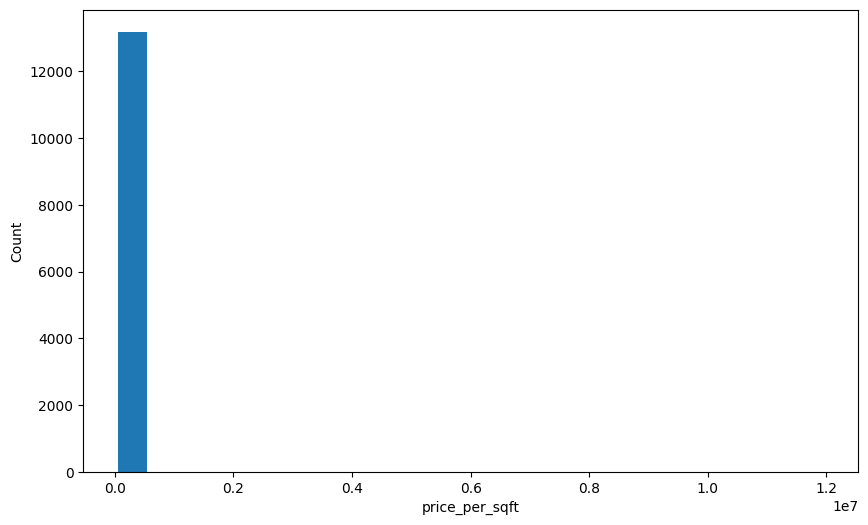

In [86]:
# Histogram
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

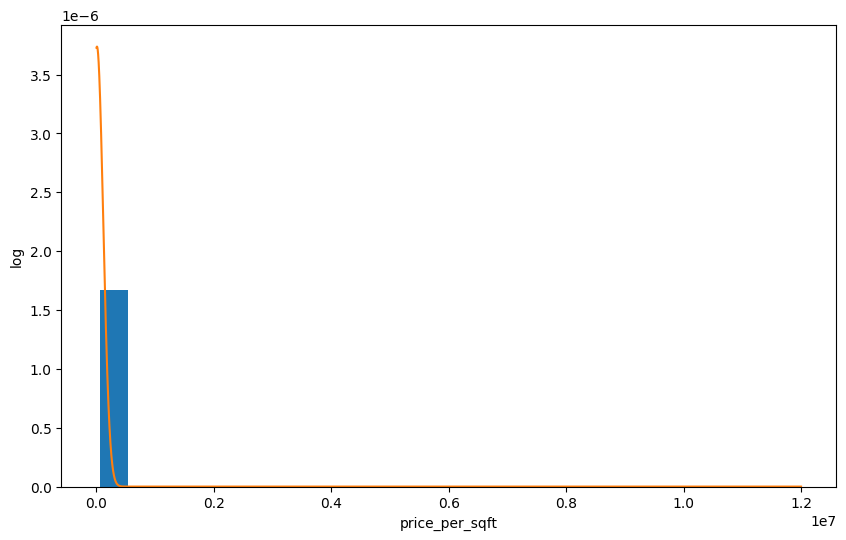

In [88]:
# Bell curve
from scipy.stats import norm
import numpy as np
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('log')

rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std()))

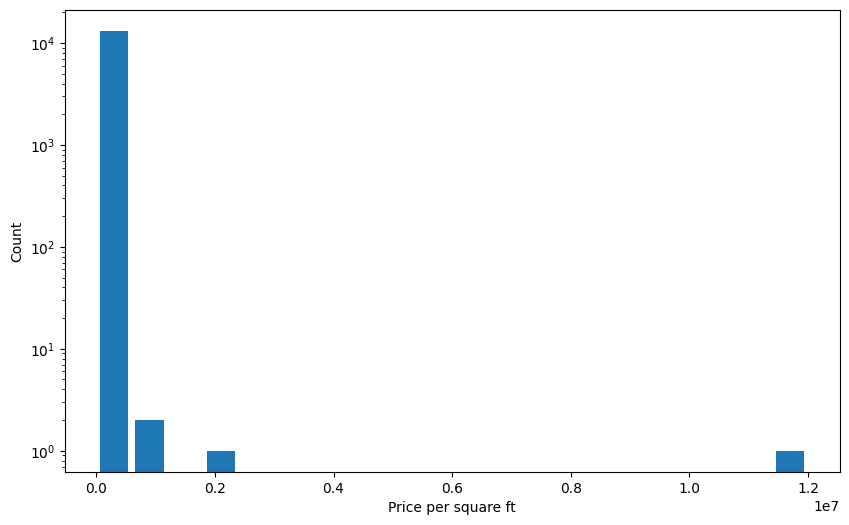

In [89]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [90]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

#### quantile outlier removal technique

In [107]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [108]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500,-0.672200
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000,8.632246
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770,16.676435
7012,other,1 BHK,650.0,1.0,500.0,1,76923,2.599103
12355,other,4 BHK,16335.0,4.0,149.0,4,912,0.246178
3934,other,1 BHK,1500.0,1.0,19.5,1,1300,-0.621924
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083,7.626722
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,0.708719
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,0.252881
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729,-0.216363


In [110]:
outliers.price_per_sqft.describe()

count    2.800000e+01
mean     5.990999e+05
std      2.279646e+06
min      2.670000e+02
25%      8.385000e+02
50%      2.623700e+04
75%      1.018098e+05
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [111]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 8)

In [112]:
df.shape

(13200, 8)

In [113]:
# total outliers to be delete
df.shape[0]-df2.shape[0]

28

### Now remove outliers using 4 standard deviation

In [114]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [115]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 8)

In [116]:
# total outliers to be delete
df2.shape[0]-df3.shape[0]

125

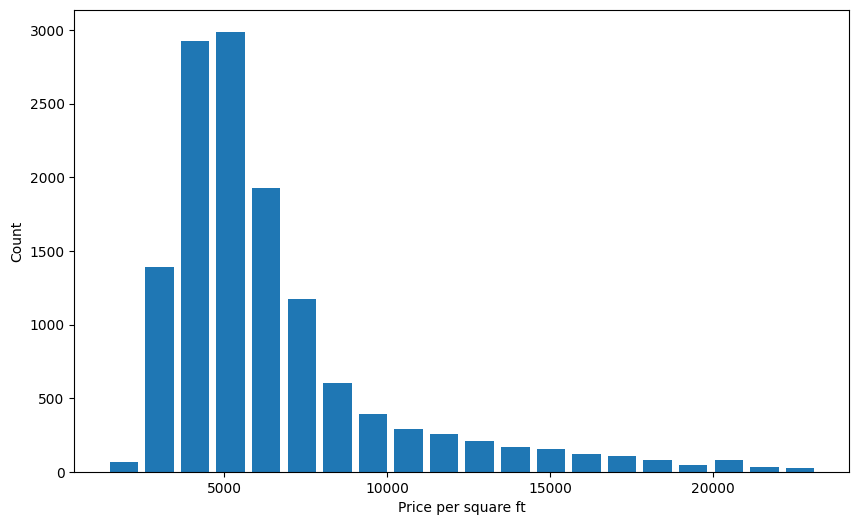

In [117]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

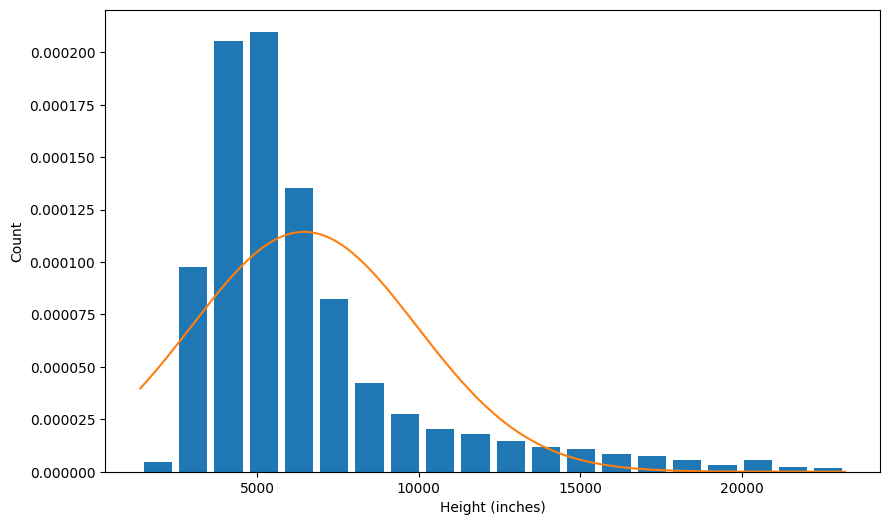

In [119]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### Alternate way to remove outliers using z-score

In [120]:
df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()

C:\Users\hp\AppData\Local\Temp\ipykernel_17116\4157992236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore']=(df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


In [121]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [123]:
df4=df2[(df2.zscore<4) & (df2.zscore>-4)]
df4.shape

(13047, 8)

## 3. IQR

In [125]:
# https://www.kaggle.com/datasets/mustafaali96/weight-height

In [127]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [130]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

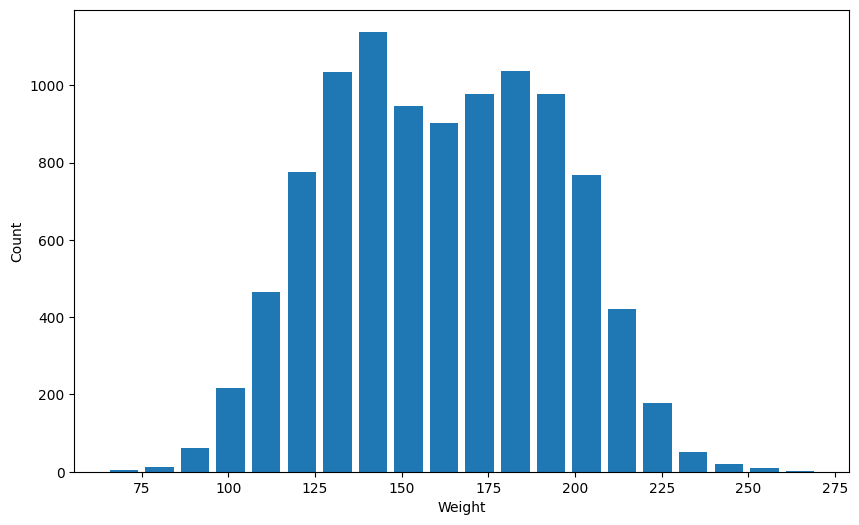

In [131]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

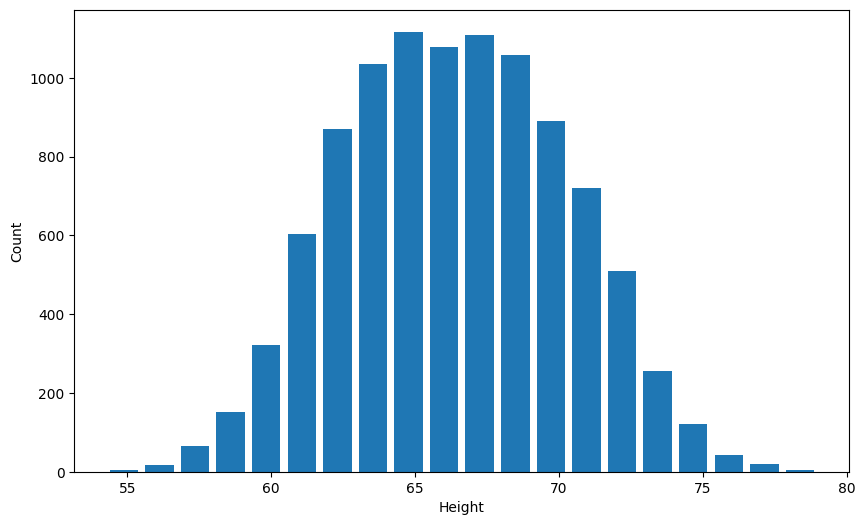

In [133]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [135]:
Q1=df.Weight.quantile(0.25)
Q3=df.Weight.quantile(0.75)
Q1,Q3

(135.8180513055015, 187.16952486868348)

In [137]:
IQR=Q3-Q1
IQR

51.35147356318197

In [138]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(264.19673521345646, 58.79084096072856)

In [140]:
df[(df.Weight>upper_limit)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [141]:
df[(df.Weight<lower_limit)]

,Gender,Height,Weight


In [142]:
df1=df[(df.Weight<upper_limit) & (df.Weight>lower_limit)]
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [143]:
df1.shape

(9999, 3)

In [145]:
# Height
Q1=df.Height.quantile(0.25)
Q3=df.Height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [146]:
IQR=Q3-Q1
IQR

5.668641245615746

In [147]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [148]:
df2=df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [150]:
df2.shape

(9992, 3)